In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

In [2]:
# read the original .csv
df = pd.read_csv('../data/all/train.csv')

In [3]:
df.shape

(25361, 2)

In [4]:
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [5]:
# add sighting_count
im_count = df[df.Id != 'new_whale'].Id.value_counts()

In [6]:
im_count.head()

w_23a388d    73
w_9b5109b    65
w_9c506f6    62
w_0369a5c    61
w_700ebb4    57
Name: Id, dtype: int64

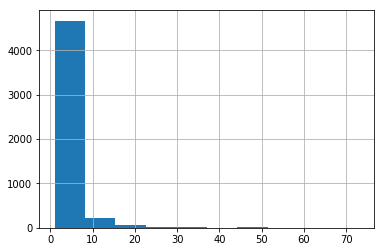

In [7]:
im_count.hist()

In [8]:
im_count.name='sighting_count'
im_count.head()

w_23a388d    73
w_9b5109b    65
w_9c506f6    62
w_0369a5c    61
w_700ebb4    57
Name: sighting_count, dtype: int64

In [9]:
type(im_count)

pandas.core.series.Series

In [10]:
im_count = pd.DataFrame(im_count)
im_count.head()

,sighting_count
w_23a388d,73
w_9b5109b,65
w_9c506f6,62
w_0369a5c,61
w_700ebb4,57


In [11]:
df = df.join(im_count, on='Id')

In [12]:
df.head()

,Image,Id,sighting_count
0,0000e88ab.jpg,w_f48451c,14.0
1,0001f9222.jpg,w_c3d896a,4.0
2,00029d126.jpg,w_20df2c5,4.0
3,00050a15a.jpg,new_whale,NaN
4,0005c1ef8.jpg,new_whale,NaN


In [13]:
df = df[df.Id != 'new_whale']
df.shape

(15697, 3)

In [16]:
%%time

res = None
sample_to = 15

for grp in df.groupby('Id'):
    n = grp[1].shape[0]
    additional_rows = grp[1].sample(0 if sample_to < n  else sample_to - n, replace=True)
    rows = pd.concat((grp[1], additional_rows))
    
    if res is None: res = rows
    else: res = pd.concat((res, rows))

CPU times: user 11.6 s, sys: 12.1 ms, total: 11.6 s
Wall time: 11.6 s


In [17]:
res[['Image', 'Id']].to_csv('../data/all/oversampled_train_no_new_whale_%d.csv'%(sample_to), index=False)

In [18]:
over_sampled = pd.read_csv('../data/all/oversampled_train_no_new_whale_15.csv')
over_sampled.head()

,Image,Id
0,833675975.jpg,w_0003639
1,833675975.jpg,w_0003639
2,833675975.jpg,w_0003639
3,833675975.jpg,w_0003639
4,833675975.jpg,w_0003639


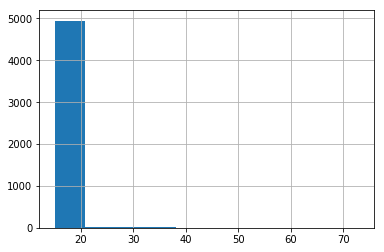

In [19]:
over_sampled.Id.value_counts().hist()

In [20]:
over_sampled.shape

(76287, 2)

In [22]:
over_sampled.Id.value_counts().median()

15.0